In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Examining the Oxford Dataset

Also found the original dataset's codebook very helpful: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md

In [2]:
data = pd.read_csv('OxCGRT_latest_responses.csv')
data.head(20)

,CountryName,CountryCode,StartDate,EndDate,PolicyType,PolicyValue,Flag,InitialNote
0,Aruba,ABW,20200310,20200624.0,H2: Testing policy,1.0,NaN,"March 10, 2020 – According to a statement by A..."
1,Aruba,ABW,20200316,20200517.0,C1: School closing,3.0,1.0,"Schools are closed starting Monday, March 16 t..."
2,Aruba,ABW,20200317,20200609.0,C8: International travel controls,4.0,NaN,Two days after the government of Aruba confirm...
3,Aruba,ABW,20200318,NaN,H1: Public information campaigns,2.0,1.0,"""ORANJESTAD – In connection with the COVID-19 ..."
4,Aruba,ABW,20200319,NaN,H3: Contact tracing,1.0,NaN,Contact tracing was noted a few times in the d...
5,Aruba,ABW,20200321,20200328.0,C2: Workplace closing,2.0,1.0,"""ORANJESTAD - The Police Department of Aruba h..."
6,Aruba,ABW,20200321,20200328.0,C6: Stay at home requirements,1.0,1.0,Mandatory curfew between 9pm and 6am everyday ...
7,Aruba,ABW,20200329,20200503.0,C2: Workplace closing,3.0,1.0,"Starting March 29, 2020, a Shelter in Place is..."
8,Aruba,ABW,20200329,20200517.0,C3: Cancel public events,2.0,1.0,"Starting March 29, 2020, a Shelter in Place is..."
9,Aruba,ABW,20200329,20200517.0,C4: Restrictions on gatherings,4.0,1.0,"Starting March 29, 2020, a Shelter in Place is..."


# Narrow down what we want to look at:

In [3]:
set(data['PolicyType'])

# we probably want to look at 'C6: Stay at home requirements'
# note from the codebook: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md
    # C = containment and closure policies, E = economic policies, H = health policies, M = miscellaneous policies
    # C6: Stay at home requirements:
        # 0 - no measures
        # 1 - recommended not leaving house
        # 2 - require not leaving house with exceptions for daily excersize, grocery shopping, and 'essential' trips
        # 3 - require not leaving house with minimal exceptions (e.g. allowed to leave once a week, or only one person can leave at a time, etc)
        # Blank - no data


{'C1: School closing',
 'C2: Workplace closing',
 'C3: Cancel public events',
 'C4: Restrictions on gatherings',
 'C5: Close public transport',
 'C6: Stay at home requirements',
 'C7: Restrictions on internal movement',
 'C8: International travel controls',
 'E1: Income support',
 'E2: Debt/contract relief',
 'H1: Public information campaigns',
 'H2: Testing policy',
 'H3: Contact tracing'}

#### From the list of policy responses ('PolicyType') we can already say that we want to look at C6: Stay at home requirements, a.k.a. Lockdown measures!

#### Now make sure that the countries we are examining with the Spotify API are also available in this dataset

In [4]:
set(data['CountryName'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guyana'

#### Start subsetting the data into the specific variables we want to analyze:

In [5]:
# start subsetting the data into the countries of interest (we chose: Italy, United States, Brazil, South Africa, and Singapore)
# subsetting based on what info is actually interesting for us 
    # (e.g. start date, end date, and policy response = stay at home restrictions!!)

data[data['PolicyType'] == 'C6: Stay at home requirements']
    


,CountryName,CountryCode,StartDate,EndDate,PolicyType,PolicyValue,Flag,InitialNote
6,Aruba,ABW,20200321,20200328.0,C6: Stay at home requirements,1.0,1.0,Mandatory curfew between 9pm and 6am everyday ...
10,Aruba,ABW,20200329,20200409.0,C6: Stay at home requirements,2.0,1.0,"Starting March 29, 2020, a Shelter in Place is..."
14,Aruba,ABW,20200410,20200410.0,C6: Stay at home requirements,3.0,1.0,"On 10th April (Good Friday), 12th April (Easte..."
15,Aruba,ABW,20200411,20200411.0,C6: Stay at home requirements,2.0,1.0,"On 10th April (Good Friday), 12th April (Easte..."
16,Aruba,ABW,20200412,20200413.0,C6: Stay at home requirements,3.0,1.0,"On 10th April (Good Friday), 12th April (Easte..."
...,...,...,...,...,...,...,...,...
5992,Montserrat,MSR,20200411,20200419.0,C6: Stay at home requirements,3.0,1.0,Curfew Lockdown enhanced - only certain surnam...
5993,Montserrat,MSR,20200420,20200422.0,C6: Stay at home requirements,2.0,1.0,Lockdown reduced to allow people to restock es...
5995,Montserrat,MSR,20200423,20200430.0,C6: Stay at home requirements,3.0,1.0,Enhanced lockdown resumes - all essential busi...
5996,Montserrat,MSR,20200501,20200630.0,C6: Stay at home requirements,2.0,1.0,Lockdown reduced to allow essential services t...


In [49]:
# make subset of Italy data
italy = data[data['CountryName'] == 'Italy']
sub_italy = italy[italy['PolicyType'] == 'C6: Stay at home requirements']

In [7]:
# make subset of South Africa data
south_africa = data[data['CountryName'] == 'South Africa']
south_africa['PolicyType']

sub_south_africa = south_africa[south_africa['PolicyType']== 'C6: Stay at home requirements'] 

In [8]:
# make subset of United States data
united_states = data[data['CountryName'] == 'United States']
sub_united_states = united_states[united_states['PolicyType'] == 'C6: Stay at home requirements']

In [95]:
# make subset of Brazil data
brazil = data[data['CountryName'] == 'Brazil']
sub_brazil = brazil[brazil['PolicyType'] == 'C6: Stay at home requirements']

In [10]:
# make subset of Singapore data
singapore = data[data['CountryName'] == 'Singapore']
sub_singapore = singapore[singapore['PolicyType'] == 'C6: Stay at home requirements']

# Concatenate the subsets

In [11]:
# create one subset to meet all criteria 

countries = ['Brazil', 'Italy', 'Singapore', 'South Africa', 'United States']

df_sub = [data[data['CountryName'] == (i for i in countries)]]  # Not sure this actually worked?! The concat method did though
          
oxford_df = pd.concat([sub_brazil, sub_italy, sub_singapore, sub_south_africa, sub_united_states], axis=0) # specify on which axis
oxford_df

,CountryName,CountryCode,StartDate,EndDate,PolicyType,PolicyValue,Flag,InitialNote
695,Brazil,BRA,20200313,20200504.0,C6: Stay at home requirements,1.0,0.0,Ministry of Health recommends that in areas wi...
708,Brazil,BRA,20200505,20200823.0,C6: Stay at home requirements,2.0,0.0,"First major city in Brazil (Sao Luis, the capi..."
713,Brazil,BRA,20200824,20200830.0,C6: Stay at home requirements,3.0,0.0,Sao Felix do Araguaia (MT) imposed a 7 days lo...
715,Brazil,BRA,20200831,NaN,C6: Stay at home requirements,2.0,0.0,In Teresina the city government determined loc...
2693,Italy,ITA,20200223,20200309.0,C6: Stay at home requirements,2.0,0.0,https://web.archive.org/web/20200409225704/htt...
2699,Italy,ITA,20200310,20200319.0,C6: Stay at home requirements,2.0,1.0,Nationwide Lockdown - everyone expected to sta...
2705,Italy,ITA,20200320,20200409.0,C6: Stay at home requirements,3.0,1.0,Stricter lockdown rules are introduced - exerc...
2707,Italy,ITA,20200410,20200503.0,C6: Stay at home requirements,2.0,1.0,Lockdown measures are relaxed slightly https:...
2711,Italy,ITA,20200504,20200726.0,C6: Stay at home requirements,1.0,1.0,"""A new government decree comes into force from..."
2725,Italy,ITA,20200727,NaN,C6: Stay at home requirements,0.0,NaN,No current instruction to remain home. Exercis...


In [12]:
##dates are in iso formats
##

# Clean, clean, clean!

For example, Spotify dates are in a more digestible format (yyyy-mm-dd), so change the str format in the oxford_df to a datetime format

In [13]:
oxford_df.dtypes
# need to change start date (int) and end date (float) to datetime

CountryName     object
CountryCode     object
StartDate        int64
EndDate        float64
PolicyType      object
PolicyValue    float64
Flag           float64
InitialNote     object
dtype: object

In [14]:
oxford_df[['StartDate', 'EndDate']]

,StartDate,EndDate
695,20200313,20200504.0
708,20200505,20200823.0
713,20200824,20200830.0
715,20200831,NaN
2693,20200223,20200309.0
2699,20200310,20200319.0
2705,20200320,20200409.0
2707,20200410,20200503.0
2711,20200504,20200726.0
2725,20200727,NaN


In [16]:
# Change the format of Start Date and End Date to match the Spotify df format

# oxford_df['StartDate']= pd.to_datetime(oxford_df['StartDate'].astype('str'), format = '%Y%m%d')
# oxford_df['EndDate'] = pd.to_datetime(oxford_df['EndDate'].astype('str'), format = '%Y%m%d')

oxford_df

,CountryName,CountryCode,StartDate,EndDate,PolicyType,PolicyValue,Flag,InitialNote
695,Brazil,BRA,2020-03-13,2020-05-04,C6: Stay at home requirements,1.0,0.0,Ministry of Health recommends that in areas wi...
708,Brazil,BRA,2020-05-05,2020-08-23,C6: Stay at home requirements,2.0,0.0,"First major city in Brazil (Sao Luis, the capi..."
713,Brazil,BRA,2020-08-24,2020-08-30,C6: Stay at home requirements,3.0,0.0,Sao Felix do Araguaia (MT) imposed a 7 days lo...
715,Brazil,BRA,2020-08-31,NaT,C6: Stay at home requirements,2.0,0.0,In Teresina the city government determined loc...
2693,Italy,ITA,2020-02-23,2020-03-09,C6: Stay at home requirements,2.0,0.0,https://web.archive.org/web/20200409225704/htt...
2699,Italy,ITA,2020-03-10,2020-03-19,C6: Stay at home requirements,2.0,1.0,Nationwide Lockdown - everyone expected to sta...
2705,Italy,ITA,2020-03-20,2020-04-09,C6: Stay at home requirements,3.0,1.0,Stricter lockdown rules are introduced - exerc...
2707,Italy,ITA,2020-04-10,2020-05-03,C6: Stay at home requirements,2.0,1.0,Lockdown measures are relaxed slightly https:...
2711,Italy,ITA,2020-05-04,2020-07-26,C6: Stay at home requirements,1.0,1.0,"""A new government decree comes into force from..."
2725,Italy,ITA,2020-07-27,NaT,C6: Stay at home requirements,0.0,NaN,No current instruction to remain home. Exercis...


# Convert this df to a csv file

In [36]:
oxford_df.to_csv('covid_concatenated.csv', sep=',')
# this is what David will use to combine the two data sources

# Play around with plotting just the Oxford data

In [18]:
# look at policy stringency over time (stringency is PolicyType)

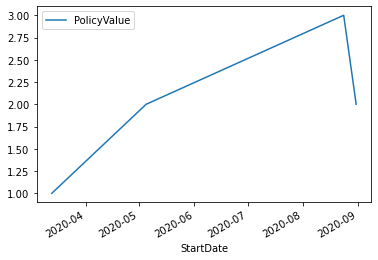

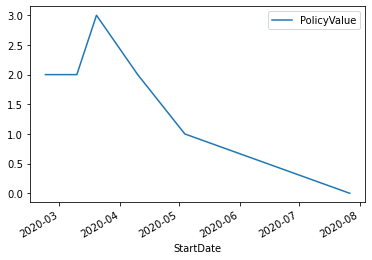

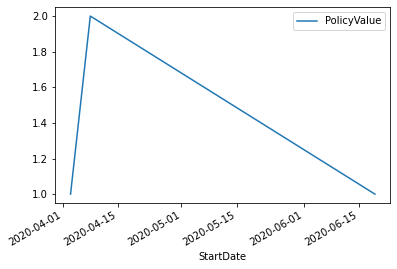

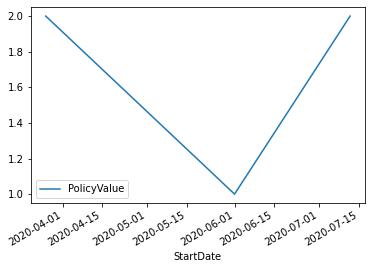

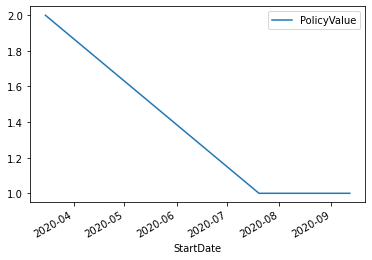

In [158]:
oxford_df.groupby(['CountryName']).plot(x = 'StartDate', y = 'PolicyValue')

plt.show()

# 
# grouped = vehicles[['City MPG', 'Year']].groupby(['Year']).mean().reset_index()

# grouped.plot(x = 'Year', y = 'City MPG')
# plt.show()
# This is not so helpful without the country names as labels

In [ ]:
# later: normalize the policy stringency by 'PolicyValue' 

In [ ]:
# plot each country's stringency over time

## Brazil: Stay at home requirements

In [98]:
# sub_brazil['StartDate']= pd.to_datetime(sub_brazil['StartDate'].astype('str'), format = '%Y%m%d')
# sub_brazil['EndDate'] = pd.to_datetime(sub_brazil['EndDate'].astype('str'), format = '%Y%m%d')

sub_brazil

<ipython-input-98-7444f6d56486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_brazil['StartDate']= pd.to_datetime(sub_brazil['StartDate'].astype('str'), format = '%Y%m%d')
<ipython-input-98-7444f6d56486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_brazil['EndDate'] = pd.to_datetime(sub_brazil['EndDate'].astype('str'), format = '%Y%m%d')


,CountryName,CountryCode,StartDate,EndDate,PolicyType,PolicyValue,Flag,InitialNote
695,Brazil,BRA,2020-03-13,2020-05-04,C6: Stay at home requirements,1.0,0.0,Ministry of Health recommends that in areas wi...
708,Brazil,BRA,2020-05-05,2020-08-23,C6: Stay at home requirements,2.0,0.0,"First major city in Brazil (Sao Luis, the capi..."
713,Brazil,BRA,2020-08-24,2020-08-30,C6: Stay at home requirements,3.0,0.0,Sao Felix do Araguaia (MT) imposed a 7 days lo...
715,Brazil,BRA,2020-08-31,NaT,C6: Stay at home requirements,2.0,0.0,In Teresina the city government determined loc...


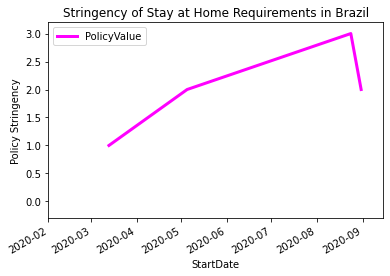

In [128]:
sub_brazil.plot('StartDate', 'PolicyValue', linewidth=3, color='magenta')
plt.ylabel('Policy Stringency')
plt.title('Stringency of Stay at Home Requirements in Brazil')
plt.xlim('2020-02-01', '2020-09-15') # change the range of dates shown on the axis to keep consistent time frames
plt.ylim(-0.3, 3.2) # change the range of the policy values to include the entire range of 0, 1, 2, or 3.

plt.show()

## Italy: Stay at home requirements

In [56]:
# sub_italy['StartDate']= pd.to_datetime(sub_italy['StartDate'].astype('str'), format = '%Y%m%d')
# sub_italy['EndDate'] = pd.to_datetime(sub_italy['EndDate'].astype('str'), format = '%Y%m%d')

sub_italy

,CountryName,CountryCode,StartDate,EndDate,PolicyType,PolicyValue,Flag,InitialNote
2693,Italy,ITA,2020-02-23,2020-03-09,C6: Stay at home requirements,2.0,0.0,https://web.archive.org/web/20200409225704/htt...
2699,Italy,ITA,2020-03-10,2020-03-19,C6: Stay at home requirements,2.0,1.0,Nationwide Lockdown - everyone expected to sta...
2705,Italy,ITA,2020-03-20,2020-04-09,C6: Stay at home requirements,3.0,1.0,Stricter lockdown rules are introduced - exerc...
2707,Italy,ITA,2020-04-10,2020-05-03,C6: Stay at home requirements,2.0,1.0,Lockdown measures are relaxed slightly https:...
2711,Italy,ITA,2020-05-04,2020-07-26,C6: Stay at home requirements,1.0,1.0,"""A new government decree comes into force from..."
2725,Italy,ITA,2020-07-27,NaT,C6: Stay at home requirements,0.0,NaN,No current instruction to remain home. Exercis...


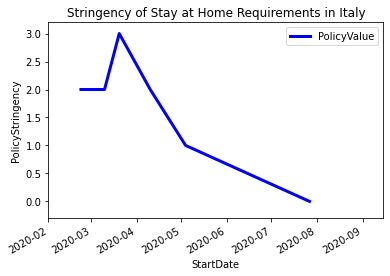

In [129]:
sub_italy.plot('StartDate', 'PolicyValue', linewidth=3, color='blue')
plt.ylabel('PolicyStringency')
plt.title('Stringency of Stay at Home Requirements in Italy')
plt.xlim('2020-02-01', '2020-09-15')
plt.ylim(-0.3, 3.2)
plt.show()


## Singapore: Stay at home requirements

In [58]:
# sub_singapore['StartDate']= pd.to_datetime(sub_singapore['StartDate'].astype('str'), format = '%Y%m%d')
# sub_singapore['EndDate'] = pd.to_datetime(sub_singapore['EndDate'].astype('str'), format = '%Y%m%d')

sub_singapore

,CountryName,CountryCode,StartDate,EndDate,PolicyType,PolicyValue,Flag,InitialNote
4683,Singapore,SGP,2020-04-03,2020-04-07,C6: Stay at home requirements,1.0,1.0,"PM Lee Hsien Loong asks all residents to ""stay..."
4688,Singapore,SGP,2020-04-08,2020-06-18,C6: Stay at home requirements,2.0,1.0,comes into force on 8 April 2020. (2) Subject ...
4698,Singapore,SGP,2020-06-19,NaT,C6: Stay at home requirements,1.0,1.0,People are encouraged to work from home wherev...


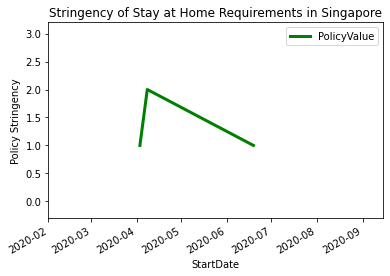

In [130]:
sub_singapore.plot('StartDate', 'PolicyValue', linewidth=3, color='green')
plt.ylabel('Policy Stringency')
plt.title('Stringency of Stay at Home Requirements in Singapore')
plt.xlim('2020-02-01', '2020-09-15')
plt.ylim(-0.3, 3.2)
plt.show()

# NOTE! can we change the scale so that the policy value can go up to 3 to match the other plots???

## South Africa: Stay at home requirements

In [60]:
# sub_south_africa['StartDate']= pd.to_datetime(sub_south_africa['StartDate'].astype('str'), format = '%Y%m%d')
# sub_south_africa['EndDate'] = pd.to_datetime(sub_south_africa['EndDate'].astype('str'), format = '%Y%m%d')

sub_south_africa

,CountryName,CountryCode,StartDate,EndDate,PolicyType,PolicyValue,Flag,InitialNote
5798,South Africa,ZAF,2020-03-26,2020-05-31,C6: Stay at home requirements,2.0,1.0,"""From midnight on Thursday, March 26 until mid..."
5806,South Africa,ZAF,2020-06-01,2020-07-11,C6: Stay at home requirements,1.0,1.0,Level 3 started at Jun 1st. While people are a...
5808,South Africa,ZAF,2020-07-12,NaT,C6: Stay at home requirements,2.0,1.0,"On July 12th, amidst rising COVID cases, Presi..."


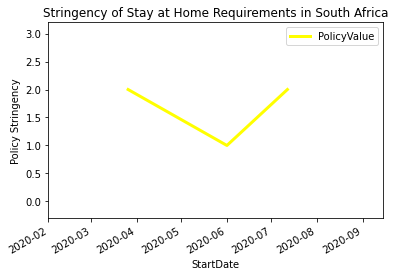

In [131]:
sub_south_africa.plot('StartDate', 'PolicyValue', linewidth=3, color='yellow')
plt.ylabel('Policy Stringency')
plt.title('Stringency of Stay at Home Requirements in South Africa')
plt.xlim('2020-02-01', '2020-09-15')
plt.ylim(-0.3, 3.2)
plt.show()

# NOTE! can we change the scale so that the policy value can go up to 3 to match the other plots???

## United States: Stay at home requirements

In [62]:
# sub_united_states['StartDate']= pd.to_datetime(sub_united_states['StartDate'].astype('str'), format = '%Y%m%d')
# sub_united_states['EndDate'] = pd.to_datetime(sub_united_states['EndDate'].astype('str'), format = '%Y%m%d')

sub_united_states

,CountryName,CountryCode,StartDate,EndDate,PolicyType,PolicyValue,Flag,InitialNote
5597,United States,USA,2020-03-15,2020-07-19,C6: Stay at home requirements,2.0,0.0,First stay at home orders on March 15th in Pue...
5606,United States,USA,2020-07-20,2020-09-11,C6: Stay at home requirements,1.0,1.0,"From CA sub-national coding: ""The governmen..."
5608,United States,USA,2020-09-12,NaT,C6: Stay at home requirements,1.0,0.0,No evidence of stay-at-home requirements in ef...


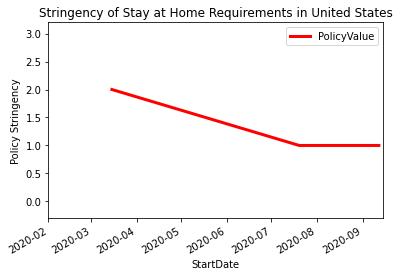

In [132]:
sub_united_states.plot('StartDate', 'PolicyValue', linewidth=3, color='red')
plt.ylabel('Policy Stringency')
plt.title('Stringency of Stay at Home Requirements in United States')
plt.xlim('2020-02-01', '2020-09-15')
plt.ylim(-0.3, 3.2)
plt.show()

# NOTE! can we change the scale so that the policy value can go up to 3 to match the other plots???

## Put all countries together:

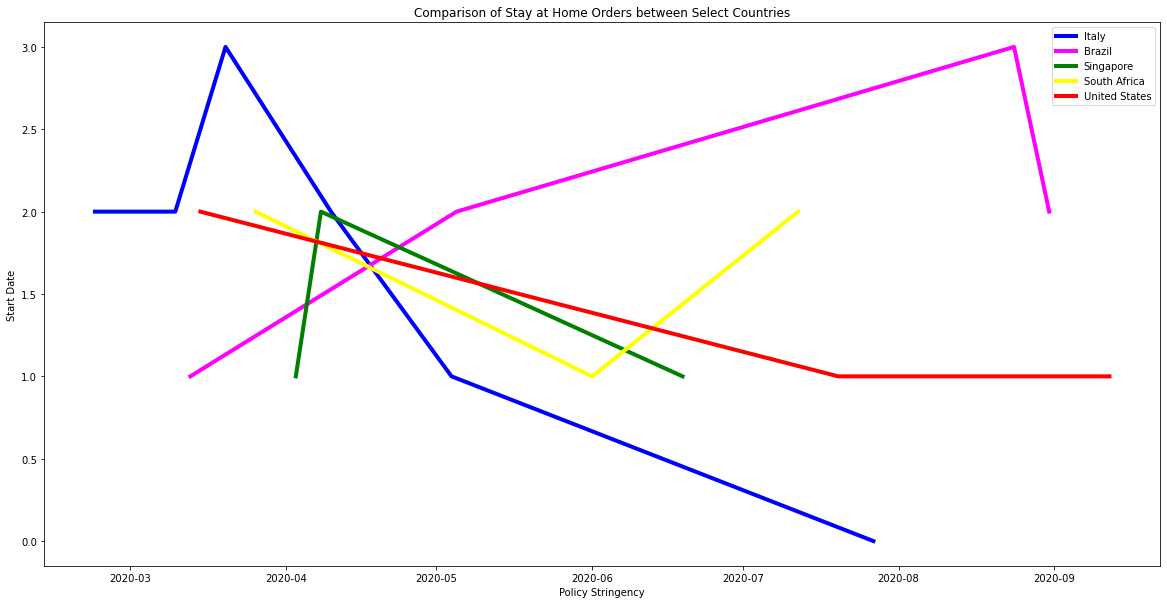

In [153]:
plt.figure(figsize=(20,10)) # need to put this before you do plt.plot()
plt.plot(sub_italy['StartDate'], sub_italy['PolicyValue'], linewidth=4, color='blue', label='Italy')
plt.plot(sub_brazil['StartDate'], sub_brazil['PolicyValue'], linewidth=4, color='magenta', label='Brazil')
plt.plot(sub_singapore['StartDate'], sub_singapore['PolicyValue'], linewidth=4, color='green', label='Singapore')
plt.plot(sub_south_africa['StartDate'], sub_south_africa['PolicyValue'], linewidth=4, color='yellow', label='South Africa')
plt.plot(sub_united_states['StartDate'], sub_united_states['PolicyValue'], linewidth=4, color='red', label='United States')
plt.xlabel('Policy Stringency')
plt.ylabel('Start Date')
plt.legend()
plt.title('Comparison of Stay at Home Orders between Select Countries')
plt.show() 

In [154]:
# NOW: try to re-makdo exactly this graph

In [ ]:
# try plotting with subplots so that they show up next to each other rather than alone